In [1]:
import re
import os
import requests


In [2]:
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
def pachong(url):
    headers = {
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'zh-CN,zh;q=0.9',
        'Cache-Control': 'max-age=0',
        'Connection': 'keep-alive',
        'Cookie': 'BAIDUID=A9D3D383EB590FB83569E200F04A55D5:FG=1; BIDUPSID=A9D3D383EB590FB83569E200F04A55D5; PSTM=1542678500; Hm_lvt_55b574651fcae74b0a9f1cf9c8d7c93a=1562682104; pgv_pvi=5575513088; pgv_si=s7463549952; Hm_lpvt_55b574651fcae74b0a9f1cf9c8d7c93a=1562688841',
        'Host': 'baike.baidu.com',
        'Upgrade-Insecure-Requests': '1',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36',
    }
    response = requests.get(url, headers=headers)
    # response.encoding = 'GBK'
    return response.content.decode("utf-8")


In [3]:
def subway_line(url_line, pattern):
    wangye = pachong(url_line)
    chazhao = pattern.findall(wangye)
    return chazhao

In [4]:
pattern = re.compile(r'<td width="204" align="center" valign="middle" colspan="1" rowspan="2"><a target=_blank href="(.*?)"')
lines = subway_line(url, pattern)
url_lines = []
for line in lines:
    line = 'https://baike.baidu.com'+line
    print(line)
    url_lines.append(line)


https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF/897830
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF/897830
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E

In [5]:
xianlu = {}
for url_line in url_lines:
#     pattern = re.compile(r'</td></tr><tr><.*?>([\u4E00-\u9FA5]{2,6})</t.><.*?>')

#   pattern = re.compile(r'</td></tr><tr><td align="center" valign="middle" colspan="1" rowspan="1">(\w+)</td><td align="center" valign="middle">')
    pattern2 = re.compile(r'<title>(.*?)_百度百科</title')
#    table = subway_line(url_line, table_pattern)
#   print(table)
#     station = subway_line(url_line, pattern)
    linekey = subway_line(url_line, pattern2)
    linekey = linekey[0]
#     xianlu[linekey] = station
# print(xianlu)

In [6]:
xianlu = {'北京地铁1号线': ['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东'],
          '北京地铁2号线': ['车公庄', '阜成门', '复兴门', '长椿街', '宣武门', '和平门', '前门', '崇文门', '北京站', '建国门', '朝阳门', '东四十条', '东直门', '雍和宫', '安定门', '鼓楼大街', '积水潭', '西直门'],
          '北京地铁4号线': ['安河桥北', '北宫门', '西苑', '圆明园', '北京大学东门', '中关村', '海淀黄庄', '人民大学', '魏公村', '国家图书馆', '动物园', '西直门', '新街口', '平安里', '西四', '灵境胡同', '西单', '宣武门', '菜市口', '陶然亭', '北京南站', '马家堡', '角门西', '公益西桥'],
          '北京地铁5号线': ['东沙各庄站', '太阳城站', '大柳树站', '宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '崇文门', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北'],
          '北京地铁6号线': ['苹果园', '杨庄', '西黄村', '廖公庄', '田村', '海淀五路居', '慈寿寺', '花园桥', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台路', '十里堡', '青年路', '褡裢坡', '黄渠', '常营', '草房', '物资学院路', '通州北关', '通运门', '北运河西', '北运河东', '郝家府', '东夏园', '潞城'],
          '北京地铁7号线': ['施园站', '北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口', '广渠门内', '广渠门外', '双井', '九龙山', '大郊亭', '百子湾', '化工', '南楼梓庄', '欢乐谷景区', '垡头', '双合', '焦化厂', '湾子'],
          '北京地铁8号线': ['瀛海南站', '南锣鼓巷', '什刹海', '鼓楼大街', '安华桥', '奥体中心', '奥林匹克公园', '林萃桥', '永泰庄', '育新', '回龙观东大街', '育知路', '天桥','木樨园', '大红门', '和义', '火箭万源', '五福堂', '瀛海', '朱辛庄'],
          '北京地铁9号线': ['丰台科技园', '科怡路', '丰台南路', '丰台东大街', '七里庄', '六里桥', '六里桥东', '北京西站', '军事博物馆', '白堆子', '白石桥南', '国家图书馆'],
          '北京地铁10号线': ['火器营', '长春桥', '车道沟', '慈寿寺', '西钓鱼台', '公主坟', '莲花桥', '六里桥', '西局', '泥洼', '丰台站', '首经贸', '纪家庙', '草桥', '角门西', '角门东', '大红门', '石榴庄', '宋家庄', '成寿寺', '分钟寺', '十里河', '潘家园', '劲松', '双井', '国贸', '金台夕照', '呼家楼', '团结湖', '农业展览馆', '亮马桥', '三元桥', '太阳宫', '芍药居', '惠新西街南口', '安贞门', '北土城', '健德门', '牡丹园', '西土城', '知春路', '知春里', '海淀黄庄', '苏州街', '巴沟', '全程', '巴沟'],
          '北京地铁13号线': [ '清河站', '西直门', '明光桥西', '大钟寺', '知春路', '五道口', '清华东路西口', '上地', '清河站', '西二旗', '龙泽', '回龙观', '霍营', '建材城东路', '立水桥', '北苑', '来广营西', '望京西', '望和桥', '芍药居', '光熙门', '柳芳', '东直门'],
          '北京地铁14号线': ['张郭庄', '园博园', '大瓦窑', '郭庄子', '大井', '七里庄', '西局', '永定门外', '景泰', '蒲黄榆', '方庄', '十里河', '北工大西门', '九龙山', '大望路', '金台路', '朝阳公园', '枣营', '东风北桥', '将台', '望京南', '阜通', '望京', '东湖渠', '来广营', '善各庄', '园博园', '大瓦窑', '郭庄子', '大井', '七里庄', '西局', '北京南站', '陶然桥', '永定门外', '景泰', '方庄', '北工大西门', '九龙山', '大望路', '金台路', '朝阳公园', '枣营', '东风北桥', '将台', '高家园', '望京南', '阜通', '望京', '东湖渠', '来广营', '善各庄'],
          '北京地铁15号线': ['俸伯', '顺义', '石门', '南法信', '后沙峪', '花梨坎', '国展', '孙河', '马泉营', '崔各庄', '望京东', '望京', '望京西', '关庄', '大屯路东', '安立路', '奥林匹克公园', '北沙滩', '六道口', '清华东路西口'],
          '北京地铁16号线': ['西苑', '农大南路', '马连洼', '西北旺', '永丰南', '永丰', '屯佃', '稻香湖路', '温阳路', '北安河'],
          '北京地铁八通线': ['施园站', '四惠', '四惠东', '高碑店', '传媒大学', '双桥', '管庄', '八里桥', '通州北苑', '果园', '九棵树', '梨园', '临河里', '土桥'],
          '北京地铁昌平线': ['昌平西山口', '十三陵景区', '昌平', '昌平东关', '北邵洼', '南邵', '沙河高教园', '沙河', '巩华城', '朱辛庄', '生命科学园', '西二旗'],
          '北京地铁亦庄线': ['宋家庄', '肖村', '小红门', '旧宫', '益庄桥', '亦庄文化园', '万源街', '荣京东街', '荣昌东街', '同济南路', '同济南路', '经海路', '次渠南', '次渠', '亦庄火车站'],
          '北京地铁房山线': ['花乡桥东站', '西白家窑站', '郭公庄', '大葆台', '稻田', '长阳', '篱笆房', '广阳城', '良乡大学城北', '良乡大学城', '良乡大学城西', '良乡南关', '苏庄', '阎村东'],
          '北京地铁S1线': ['金安桥站', '四道桥站', '桥户营站', '上岸站', '栗园庄站', '小园站', '石厂站'],
          '北京地铁燕房线': ['阎村东站', '紫草坞站', '阎村站', '星城站', '马各庄站', '饶乐府站', '房山城关站', '燕山站']
          }


定义一个函数，表示各线路之间的换乘关系

In [7]:
def transfer(subway_line1,subway_line2):
    transfer_station=set(subway_line1)&set(subway_line2)
    return transfer_station
transfer(xianlu['北京地铁1号线'],xianlu['北京地铁2号线'])

{'复兴门', '建国门'}

建立一个字典，包含线路，及线路中各站点之间的连接

In [8]:
def neighbor(station):
    neighbor_station = []
    for line in xianlu:
        stations = xianlu[line]
        for i in range(len(stations)):
            if stations[i] == station:
                if i > 0 and (i < len(stations)-1):
                    neighbor_station.append(stations[i-1])
                    neighbor_station.append(stations[i+1])
                elif i == 0:
                    neighbor_station.append(stations[i+1])
                else:
                    neighbor_station.append(stations[i-1])
    return neighbor_station

In [9]:
all_graph={}
for key in xianlu:
    graph={}
    
    stations = xianlu[key]
    for i,station in enumerate(stations):
        neighbor_station = []
        if i==0:
            neighbor_station.append(stations[i+1])
        elif i==len(stations)-1:
            neighbor_station.append(stations[i-1])                          

        else:
            neighbor_station.append(stations[i+1])
            neighbor_station.append(stations[i-1])
        graph[station]=neighbor_station
    all_graph[key]=graph
all_graph

        
        
        
        

{'北京地铁10号线': {'三元桥': ['太阳宫', '亮马桥'],
  '丰台站': ['首经贸', '泥洼'],
  '亮马桥': ['三元桥', '农业展览馆'],
  '健德门': ['牡丹园', '北土城'],
  '全程': ['巴沟', '巴沟'],
  '公主坟': ['莲花桥', '西钓鱼台'],
  '六里桥': ['西局', '莲花桥'],
  '农业展览馆': ['亮马桥', '团结湖'],
  '分钟寺': ['十里河', '成寿寺'],
  '劲松': ['双井', '潘家园'],
  '北土城': ['健德门', '安贞门'],
  '十里河': ['潘家园', '分钟寺'],
  '双井': ['国贸', '劲松'],
  '呼家楼': ['团结湖', '金台夕照'],
  '团结湖': ['农业展览馆', '呼家楼'],
  '国贸': ['金台夕照', '双井'],
  '大红门': ['石榴庄', '角门东'],
  '太阳宫': ['芍药居', '三元桥'],
  '安贞门': ['北土城', '惠新西街南口'],
  '宋家庄': ['成寿寺', '石榴庄'],
  '巴沟': ['全程'],
  '惠新西街南口': ['安贞门', '芍药居'],
  '慈寿寺': ['西钓鱼台', '车道沟'],
  '成寿寺': ['分钟寺', '宋家庄'],
  '泥洼': ['丰台站', '西局'],
  '海淀黄庄': ['苏州街', '知春里'],
  '潘家园': ['劲松', '十里河'],
  '火器营': ['长春桥'],
  '牡丹园': ['西土城', '健德门'],
  '知春路': ['知春里', '西土城'],
  '知春里': ['海淀黄庄', '知春路'],
  '石榴庄': ['宋家庄', '大红门'],
  '纪家庙': ['草桥', '首经贸'],
  '芍药居': ['惠新西街南口', '太阳宫'],
  '苏州街': ['巴沟', '海淀黄庄'],
  '草桥': ['角门西', '纪家庙'],
  '莲花桥': ['六里桥', '公主坟'],
  '西土城': ['知春路', '牡丹园'],
  '西局': ['泥洼', '六里桥'],
  '西钓鱼台': ['公主坟', '慈寿寺'],
 

In [10]:
for key in all_graph:
    print(key)

北京地铁1号线
北京地铁2号线
北京地铁4号线
北京地铁5号线
北京地铁6号线
北京地铁7号线
北京地铁8号线
北京地铁9号线
北京地铁10号线
北京地铁13号线
北京地铁14号线
北京地铁15号线
北京地铁16号线
北京地铁八通线
北京地铁昌平线
北京地铁亦庄线
北京地铁房山线
北京地铁S1线
北京地铁燕房线


此时的all_graph中并没有包含换乘的站点之间的连接关系，因此我们需要连接上去

In [11]:
for j,subway_line_1 in enumerate(all_graph):
    for k,subway_line_2 in enumerate(all_graph):        
        if j != k:
            transfer_stations = transfer(all_graph[subway_line_1],all_graph[subway_line_2])
            if len(transfer_stations):
                for all_subway_line in all_graph:
                    for all_station in all_graph[all_subway_line]:
                        for transfer_station in transfer_stations:                    
                            if all_station == transfer_station:
                                all_graph[all_subway_line][all_station]=all_graph[subway_line_1][transfer_station]+all_graph[subway_line_2][transfer_station]
                                all_graph[all_subway_line][all_station]=list(set(all_graph[all_subway_line][all_station]))

In [12]:
A=all_graph['北京地铁1号线']['复兴门']
A

['南礼士路', '西单', '长椿街', '阜成门']

In [13]:
all_graph

{'北京地铁10号线': {'三元桥': ['太阳宫', '亮马桥'],
  '丰台站': ['首经贸', '泥洼'],
  '亮马桥': ['三元桥', '农业展览馆'],
  '健德门': ['牡丹园', '北土城'],
  '全程': ['巴沟', '巴沟'],
  '公主坟': ['莲花桥', '军事博物馆', '西钓鱼台', '万寿路'],
  '六里桥': ['莲花桥', '六里桥东', '七里庄', '西局'],
  '农业展览馆': ['亮马桥', '团结湖'],
  '分钟寺': ['十里河', '成寿寺'],
  '劲松': ['双井', '潘家园'],
  '北土城': ['健德门', '安贞门'],
  '十里河': ['方庄', '北工大西门', '分钟寺', '潘家园'],
  '双井': ['九龙山', '国贸', '劲松', '广渠门外'],
  '呼家楼': ['团结湖', '金台路', '金台夕照', '东大桥'],
  '团结湖': ['农业展览馆', '呼家楼'],
  '国贸': ['永安里', '金台夕照', '双井', '大望路'],
  '大红门': ['角门东', '和义', '木樨园', '石榴庄'],
  '太阳宫': ['芍药居', '三元桥'],
  '安贞门': ['北土城', '惠新西街南口'],
  '宋家庄': ['大柳树站', '刘家窑', '成寿寺', '石榴庄'],
  '巴沟': ['全程'],
  '惠新西街南口': ['安贞门', '惠新西街北口', '和平西桥', '芍药居'],
  '慈寿寺': ['西钓鱼台', '车道沟', '花园桥', '海淀五路居'],
  '成寿寺': ['分钟寺', '宋家庄'],
  '泥洼': ['丰台站', '西局'],
  '海淀黄庄': ['苏州街', '中关村', '知春里', '人民大学'],
  '潘家园': ['劲松', '十里河'],
  '火器营': ['长春桥'],
  '牡丹园': ['西土城', '健德门'],
  '知春路': ['西土城', '知春里', '大钟寺', '五道口'],
  '知春里': ['海淀黄庄', '知春路'],
  '石榴庄': ['宋家庄', '大红门'],
  '纪家庙': ['草桥', '首经贸'

In [14]:
print(all_graph['北京地铁1号线'])

{'苹果园': ['古城', '杨庄'], '古城': ['八角游乐园', '苹果园'], '八角游乐园': ['八宝山', '古城'], '八宝山': ['玉泉路', '八角游乐园'], '玉泉路': ['五棵松', '八宝山'], '五棵松': ['万寿路', '玉泉路'], '万寿路': ['公主坟', '五棵松'], '公主坟': ['莲花桥', '军事博物馆', '西钓鱼台', '万寿路'], '军事博物馆': ['白堆子', '木樨地', '北京西站', '公主坟'], '木樨地': ['南礼士路', '军事博物馆'], '南礼士路': ['复兴门', '木樨地'], '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'], '西单': ['灵境胡同', '天安门西', '宣武门', '复兴门'], '天安门西': ['天安门东', '西单'], '天安门东': ['王府井', '天安门西'], '王府井': ['东单', '天安门东'], '东单': ['王府井', '建国门', '崇文门', '灯市口'], '建国门': ['朝阳门', '北京站', '永安里', '东单'], '永安里': ['国贸', '建国门'], '国贸': ['永安里', '金台夕照', '双井', '大望路'], '大望路': ['九龙山', '国贸', '四惠', '金台路'], '四惠': ['施园站', '大望路', '四惠东'], '四惠东': ['高碑店', '四惠']}


现在我们定义一个函数，用来给我们规划路线

In [15]:
def subway_linenum(station_name):
    subway_lines=[]
    for line in xianlu:
        for station in xianlu[line]:
            if station ==  station_name:
                subway_lines.append(line)
    return subway_lines
subway_linenum('苹果园')

['北京地铁1号线', '北京地铁6号线']

In [16]:
def pretty_print(station):
    print('->'.join(stations))


In [17]:
def map(start,destination):
    subway_lines = subway_linenum(start)
    pathes = [[start]]
    seen = set()
    while pathes:
        for subway_line in  subway_lines: 
            path = pathes.pop(0)
            froniter = path[-1]
            if froniter in seen:
                continue          
            successors=all_graph[subway_line][froniter]        
            for station in successors:
                if station in path:
                    continue
                new_path = path + [station]
                pathes.append(new_path)
                if station == destination:    
                    return pretty_print(new_path)
            seen.add(froniter)

map('苹果园','西单')

KeyError: '古城'

### 这里函数没有定义出来，希望助教老师帮忙瞅瞅，想把线路，换乘，站名，全都列出来！！！

D:\Anaconda3.5\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\Anaconda3.5\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
D:\Anaconda3.5\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
D:\Anaconda3.5\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\Anaconda3.5\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.

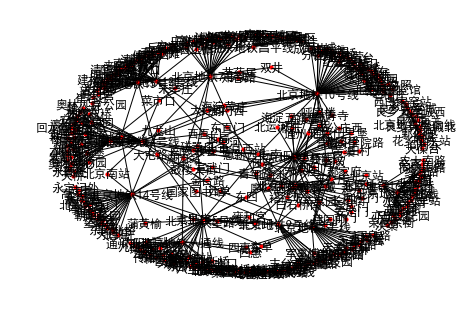

In [24]:
import networkx as nx

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

cities_connection_graph = nx.Graph(xianlu)
nx.draw(cities_connection_graph, with_labels=True, node_size=10)
